In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

On fait des plots sur les runs

In [2]:
from problem.workflow import print

# Data

In [3]:
from problem.mnist import load_data

In [4]:
X, y = load_data()

# Load models

In [5]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from main import get_data_shape

In [6]:
def load_models(get_model, *args, **kwargs):
    models = []
    n_features, n_classes = get_data_shape('mnist')
    for i in range(12):
        model = get_model(*args, n_features=n_features, n_classes=n_classes, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from myNN import get_model as get_model_NN
from myNNDA import get_model as get_model_NNDA
from myNNA import get_model as get_model_NNA
from myTP import get_model as get_model_TP
from myPAN import get_model as get_model_PAN


# Test submission

In [8]:
from problem.mnist import test_submission


In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [12]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=21)
# z_list = np.linspace(-5, 5, num=10)


In [14]:
print(z_list)

2017-12-19 16:59:36 [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]


In [15]:
NN_models = load_models(get_model_NN, preprocessing=preprocessing)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2017-12-19 16:59:50 testing model 1/12
2017-12-19 17:00:27 testing model 2/12
2017-12-19 17:01:04 testing model 3/12
2017-12-19 17:01:41 testing model 4/12
2017-12-19 17:02:18 testing model 5/12
2017-12-19 17:02:55 testing model 6/12
2017-12-19 17:03:32 testing model 7/12
2017-12-19 17:04:08 testing model 8/12
2017-12-19 17:04:45 testing model 9/12
2017-12-19 17:05:22 testing model 10/12
2017-12-19 17:05:59 testing model 11/12
2017-12-19 17:06:36 testing model 12/12
2017-12-19 17:07:12 Done.


In [16]:
NNDA_models = load_models(get_model_NNDA, preprocessing=preprocessing, skew=skew, width=5., )
df_list = test_submission(NNDA_models, X, y, z_list=z_list)
NNDA_mean_acc, NNDA_std_acc = get_mean_std(df_list)


2017-12-19 17:07:13 testing model 1/12
2017-12-19 17:07:49 testing model 2/12
2017-12-19 17:08:26 testing model 3/12
2017-12-19 17:09:03 testing model 4/12
2017-12-19 17:09:39 testing model 5/12
2017-12-19 17:10:17 testing model 6/12
2017-12-19 17:10:54 testing model 7/12
2017-12-19 17:11:31 testing model 8/12
2017-12-19 17:12:08 testing model 9/12
2017-12-19 17:12:44 testing model 10/12
2017-12-19 17:13:22 testing model 11/12
2017-12-19 17:13:59 testing model 12/12
2017-12-19 17:14:37 Done.


In [17]:
NNA_models = load_models(get_model_NNA, preprocessing=preprocessing, skew=skew, width=5., )
df_list = test_submission(NNA_models, X, y, z_list=z_list)
NNA_mean_acc, NNA_std_acc = get_mean_std(df_list)


2017-12-19 17:14:37 testing model 1/12
2017-12-19 17:15:14 testing model 2/12
2017-12-19 17:15:51 testing model 3/12
2017-12-19 17:16:27 testing model 4/12
2017-12-19 17:17:03 testing model 5/12
2017-12-19 17:17:39 testing model 6/12
2017-12-19 17:18:14 testing model 7/12
2017-12-19 17:18:49 testing model 8/12
2017-12-19 17:19:24 testing model 9/12
2017-12-19 17:19:59 testing model 10/12
2017-12-19 17:20:35 testing model 11/12
2017-12-19 17:21:11 testing model 12/12
2017-12-19 17:21:45 Done.


In [18]:
TP_models = load_models(get_model_TP, preprocessing=preprocessing, tangent=tangent, trade_off=1.0, )
df_list = test_submission(TP_models, X, y, z_list=z_list)
TP_mean_acc, TP_std_acc = get_mean_std(df_list)


2017-12-19 17:21:45 testing model 1/12
2017-12-19 17:22:19 testing model 2/12
2017-12-19 17:22:54 testing model 3/12
2017-12-19 17:23:29 testing model 4/12
2017-12-19 17:24:04 testing model 5/12
2017-12-19 17:24:38 testing model 6/12
2017-12-19 17:25:13 testing model 7/12
2017-12-19 17:25:47 testing model 8/12
2017-12-19 17:26:21 testing model 9/12
2017-12-19 17:26:56 testing model 10/12
2017-12-19 17:27:30 testing model 11/12
2017-12-19 17:28:04 testing model 12/12
2017-12-19 17:28:38 Done.


In [19]:
PAN_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, width=5., trade_off=1.0)
df_list = test_submission(PAN_models, X, y, z_list=z_list)
PAN_mean_acc, PAN_std_acc = get_mean_std(df_list)


INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-0/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-1/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-2/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-3/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-4/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-1.0-5.0-Adam-SGD-SGD-5/weights.ckpt
INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x12

# Plot


- What about confusion matrices ???


In [20]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

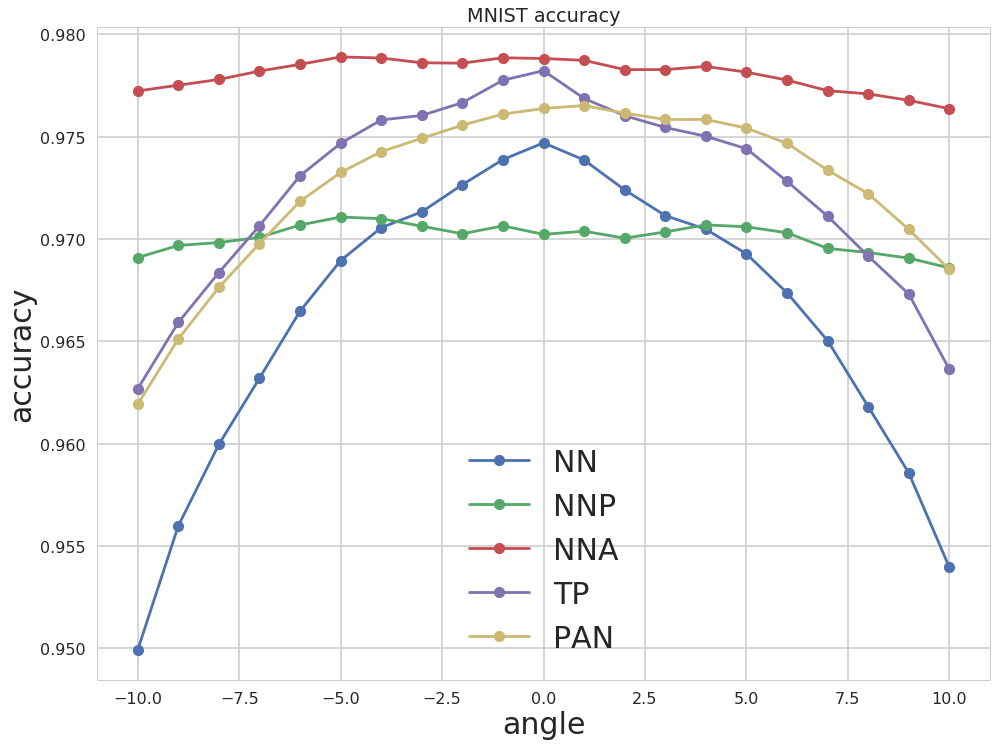

In [24]:
z = z_list

plt.figure(figsize=(8*2,6*2))

plt.plot(z, NN_mean_acc, 'o-', label='NN')
# plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, NNDA_mean_acc, 'o-', label='NNP')
# plt.fill_between(z, NNDA_mean_acc+NNDA_std_acc, NNDA_mean_acc-NNDA_std_acc, alpha=0.5)

plt.plot(z, NNA_mean_acc, 'o-', label='NNA')
# plt.fill_between(z, NNA_mean_acc+NNA_std_acc, NNA_mean_acc-NNA_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, 'o-', label='TP')
# plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

plt.plot(z, PAN_mean_acc, 'o-', label='PAN')
# plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.title('MNIST accuracy')

plt.xlabel('angle', fontsize=30)
plt.ylabel('accuracy', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()


# Playground

In [18]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [19]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [20]:
# X_test.shape

In [21]:
# from myNNDA import data_augment

In [22]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [23]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()

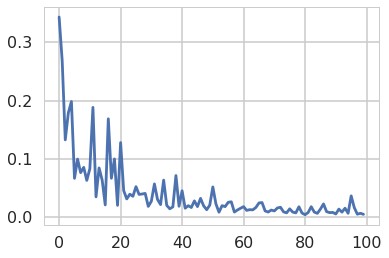

In [24]:
model = TP_models[0]
plt.plot(model.losses)
plt.show()

In [25]:
df_list[0]

,z,accuracy
0,-10.000000,0.960429
1,-8.947368,0.965000
2,-7.894737,0.968214
3,-6.842105,0.969500
4,-5.789474,0.971786
5,-4.736842,0.972857
6,-3.684211,0.973286
7,-2.631579,0.974000
8,-1.578947,0.975214
9,-0.526316,0.975286


In [26]:
df_list[0]

,z,accuracy
0,-10.000000,0.960429
1,-8.947368,0.965000
2,-7.894737,0.968214
3,-6.842105,0.969500
4,-5.789474,0.971786
5,-4.736842,0.972857
6,-3.684211,0.973286
7,-2.631579,0.974000
8,-1.578947,0.975214
9,-0.526316,0.975286


In [27]:
for df in df_list:
    print(df.iloc[10])

2017-12-08 17:27:01 z           0.526316
accuracy    0.976000
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.975214
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.975143
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.977286
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.978571
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.973786
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.977357
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.978214
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.976786
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.978429
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
accuracy    0.974357
Name: 10, dtype: float64
2017-12-08 17:27:01 z           0.526316
ac